# Data Analysis Interview Challenge

## Part 1 ‑ Exploratory data analysis

### Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

### Load JSON data

In [2]:
# load as Pandas dataframe
data = pd.read_json('logins.json')

### Exploratory data analysis

In [3]:
data.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


__Aggregate login counts based on 15 minute time intervals__

In [4]:
# Re-sampling the data into 15 minute intervals and counting the time of each login.
data['count'] = 1
df = data.set_index('login_time')
df.head()
intervals = df.resample('15T').sum()
intervals.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [5]:
print('First timestamp: {}'.format(intervals.index.min())) 
print('Last timestamp: {}'.format(intervals.index.max())) 

First timestamp: 1970-01-01 20:00:00
Last timestamp: 1970-04-13 18:45:00


The data set contain records of the user login information from 1st January 1970 to 13th April 1970.

Let's resample the data into hourly averages and look at the patterns for each full month.

In [6]:
intervals_hourly = intervals.resample('H').mean()

In [7]:
intervals_hourly['month'] = intervals_hourly.index.month
intervals_hourly['day'] = intervals_hourly.index.day
intervals_hourly['hour'] = intervals_hourly.index.hour
intervals_hourly['weekday'] = 0
intervals_hourly['weekend'] = 'Maybe'

In [8]:
january = intervals_hourly[intervals_hourly['month'] == 1]
february = intervals_hourly[intervals_hourly['month'] == 2]
march = intervals_hourly[intervals_hourly['month'] == 3]

Text(0.5, 1.0, 'Fig 1 - January Daily Cycle of Useage')

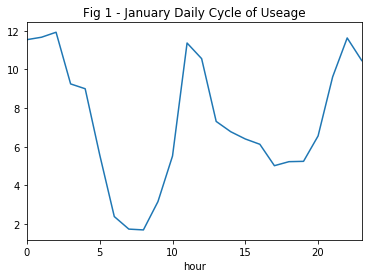

In [9]:
january_hourly = january.groupby(['hour']).mean()
february_hourly = february.groupby(['hour']).mean()
march_hourly = march.groupby(['hour']).mean()
january_hour = january_hourly['count'].plot()
january_hour.set_title('Fig 1 - January Daily Cycle of Useage')

Text(0.5, 1.0, 'Fig 2 - February Daily Cycle of Useage')

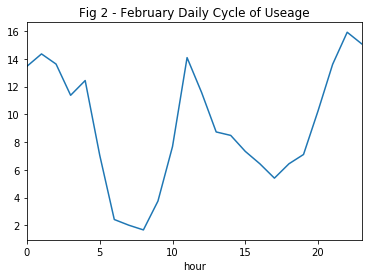

In [10]:
february_hour = february_hourly['count'].plot()
february_hour.set_title('Fig 2 - February Daily Cycle of Useage')

Text(0.5, 1.0, 'Fig 3 - March Daily Cycle of Useage')

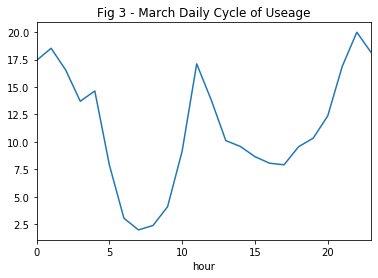

In [11]:
march_hour = march_hourly['count'].plot()
march_hour.set_title('Fig 3 - March Daily Cycle of Useage')

We can see from the monthly averages, that peak hours is between 11AM - 1PM and 9PM - 11pm. From a business perspective, we can perhaps start targeting advertisements at 11AM - 1PM and 9pm - 11pm.

We can also see from the above charts that there is a usual peak in login time

In [12]:
ih = intervals.resample('H').sum()
ih['month'] = ih.index.month
ih['day'] = ih.index.day
ih['hour'] = ih.index.hour
ih['weekday'] = 0

In [13]:
ih.head()

,count,month,day,hour,weekday
login_time,,,,,
1970-01-01 20:00:00,24,1,1,20,0
1970-01-01 21:00:00,9,1,1,21,0
1970-01-01 22:00:00,21,1,1,22,0
1970-01-01 23:00:00,58,1,1,23,0
1970-01-02 00:00:00,53,1,2,0,0


In [14]:
for index, row in ih.iterrows():
    row['weekday'] = datetime.date(1970,row['month'], row['day']).weekday()

In [15]:
for index, row in ih.iterrows():
    if row['weekday'] == 4:
        ih.loc[index, 'weekend'] = 'Yes'
    elif row['weekday'] == 5:
        ih.loc[index, 'weekend'] = 'Yes'
    elif row['weekday'] == 6:
        ih.loc[index, 'weekend'] = 'Yes'
    else:
        ih.loc[index, 'weekend'] = 'No'

Text(0.5, 1.0, 'Fig. 4 - Box Plot of daily weekend per hour of useage')

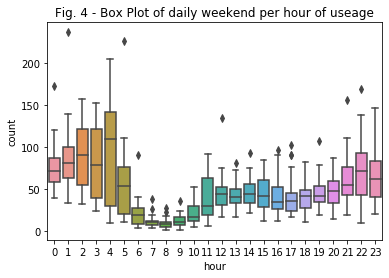

In [16]:
weekend_box = sns.boxplot(x="hour", y="count",data=ih[ih['weekend'] =='Yes'])
weekend_box.set_title('Fig. 4 - Box Plot of daily weekend per hour of useage')

Text(0.5, 1.0, 'Fig 5 - Box Plot of daily weekday per hour of usage')

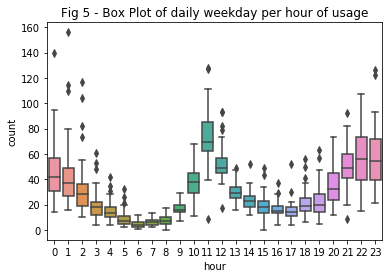

In [17]:
weekday_box = sns.boxplot(x="hour", y="count",data=ih[ih['weekend'] =='No'])
weekday_box.set_title('Fig 5 - Box Plot of daily weekday per hour of usage')

In [18]:
intervals_daily = intervals.resample('D').sum()
intervals_daily['month'] = intervals_daily.index.month
intervals_daily['day'] = intervals_daily.index.day
intervals_daily['hour'] = intervals_daily.index.hour
intervals_daily['weekday'] = 0

In [19]:
for index, row in intervals_daily.iterrows():
    row['weekday'] = datetime.date(1970,row['month'], row['day']).weekday()

In [20]:
intervals_daily.head()

,count,month,day,hour,weekday
login_time,,,,,
1970-01-01,112,1,1,0,3
1970-01-02,681,1,2,0,4
1970-01-03,793,1,3,0,5
1970-01-04,788,1,4,0,6
1970-01-05,459,1,5,0,0


In [21]:
intervals_daily['weekend'] = 'Maybe'

In [22]:
for index, row in intervals_daily.iterrows():
    if row['weekday'] == 4:
        intervals_daily.loc[index, 'weekend'] = 'Yes'
    elif row['weekday'] == 5:
        intervals_daily.loc[index, 'weekend'] = 'Yes'
    elif row['weekday'] == 6:
        intervals_daily.loc[index, 'weekend'] = 'Yes'
    else:
        intervals_daily.loc[index, 'weekend'] = 'No'

In [23]:
intervals_daily.head()

,count,month,day,hour,weekday,weekend
login_time,,,,,,
1970-01-01,112,1,1,0,3,No
1970-01-02,681,1,2,0,4,Yes
1970-01-03,793,1,3,0,5,Yes
1970-01-04,788,1,4,0,6,Yes
1970-01-05,459,1,5,0,0,No


Text(0.5, 1.0, 'Figure 6 - Weekday Boxplot')

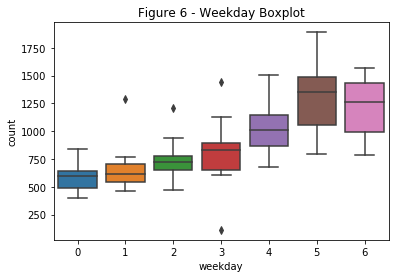

In [24]:
weekdays = sns.boxplot(x='weekday', y='count', data=intervals_daily)
weekdays.set_title('Figure 6 - Weekday Boxplot')

We can see here that users typically login more on weekends vs weekdays. There are some outliers that will need to be explored (i.e. on Tuesday, Wednesday, and Friday) to ensure we know that there are no faults in the data.

<h3>Summary of Findings/Next Steps</h3>

<p>Summary of Findings</p>
<p>1. Based on the sample size we have of 3 months, we can see that there is a peak login at around 11AM - 1PM and 9PM - 11PM. Based on intuition, we would assume that this is because users login during lunch and right before they sleep. <br>2. We see that users typically do not login at night time - suspecting that this is sleeping time. <br>3. We see there is a spike in useage during the weekend as well. </p>

<p>Next steps</p>
<p>1. There seems to be a few outliers per figure 6. There are a few daily datapoints that appear to be higher on Tuesday, Wednesday and Thursday that require further explanation. There may have been a bug or a promotion going on during these days which caused the spikes, however we will still need to explore more. <br>2. Based on users logging in, we can target ads at 11AM - 1PM and 9PM - 11PM on average for weekdays (per figure - 5). We can also push ads on weekends per figure 6 that users log in more on weekends vs weekdays.</p>